In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # 경고 메시지 무시

In [92]:
# 한글 폰트 설정
import os
os.name

# 한글 폰트 설정
import os
if os.name == 'posix' :
    plt.rc('font', family='AppleGothic')    # 맥
else:
    plt.rc('font', family='Malgun Gothic')  # 윈도우

# 마이너스 폰트 깨지는 문제애 대한 대처
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 더 선명해짐
%config InlineBackend.figure_font = 'retina'

In [93]:
## 데이터 불러오기
import chardet

# 파일의 인코딩 감지
with open("C:/Users/yuzln/Desktop/농식품 구매정보 데이터 시각화/원본 파일/fruits1023.csv", 'rb') as file:
    raw_data = file.read(10000)  # 파일의 처음 10,000 바이트 읽기
    result = chardet.detect(raw_data)

    encoding = result['encoding']
    print(f"파일 인코딩: {encoding}")


# 감지된 인코딩으로 파일 읽기
df = pd.read_csv("C:/Users/yuzln/Desktop/농식품 구매정보 데이터 시각화/원본 파일/fruits1023.csv", encoding=encoding, encoding_errors='ignore')

print(df.shape)
df.head(3)

파일 인코딩: EUC-KR
(538382, 49)


,year,month,panel_code,panel_code_new,type_method,type_method_etc,type_channel_new,type_channel,type_channel_etc,shop_day,...,retail_new,shop_time,take_out,transport_pre,transport_post,panel_type,edit,family_num_level,age1_group,income_v2
0,2010,1,PN00000001,A20000001,NaN,NaN,슈퍼마켓,기업형슈퍼마켓,NaN,2010-01-19,...,기업형슈퍼마켓,NaN,0,NaN,NaN,0.0,0,3,40,200만원 미만
1,2010,1,PN00000001,A20000001,NaN,NaN,슈퍼마켓,슈퍼마켓,NaN,2010-01-18,...,슈퍼마켓,NaN,0,NaN,NaN,0.0,0,3,40,200만원 미만
2,2010,1,PN00000001,A20000001,NaN,NaN,슈퍼마켓,슈퍼마켓,NaN,2010-01-27,...,슈퍼마켓,NaN,0,NaN,NaN,0.0,0,3,40,200만원 미만


# 1. 데이터 확인

In [94]:
# 변수 기본 정보 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538382 entries, 0 to 538381
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              538382 non-null  int64  
 1   month             538382 non-null  int64  
 2   panel_code        538382 non-null  object 
 3   panel_code_new    491529 non-null  object 
 4   type_method       47699 non-null   object 
 5   type_method_etc   18 non-null      object 
 6   type_channel_new  538382 non-null  object 
 7   type_channel      530370 non-null  object 
 8   type_channel_etc  33 non-null      object 
 9   shop_day          538382 non-null  object 
 10  shop_week         538382 non-null  object 
 11  store             538353 non-null  object 
 12  store_code        35906 non-null   object 
 13  store_region      534267 non-null  object 
 14  product           538381 non-null  object 
 15  product_code      123707 non-null  object 
 16  wide              53

In [95]:
# 결측치 확인
df.isnull().sum()

year                     0
month                    0
panel_code               0
panel_code_new       46853
type_method         490683
type_method_etc     538364
type_channel_new         0
type_channel          8012
type_channel_etc    538349
shop_day                 0
shop_week                0
store                   29
store_code          502476
store_region          4115
product                  1
product_code        414675
wide                     0
middle                   0
detail                   0
country             514561
purchase                 0
discount            205117
quantity                 0
q_unit              108763
weight_quantity      14711
w_q_unit            377394
multi_quantity       36052
m_unit              425891
w_multi_quantity    457413
w_multi_unit        505121
w_q_kg              100460
w_q_kg_unit         441841
unit_cost           433162
special_diary       512901
bill                483221
bundle              502986
payment             536973
r

In [96]:
# 결측값 비율
df.isnull().sum() / len(df)

year                0.000000
month               0.000000
panel_code          0.000000
panel_code_new      0.087026
type_method         0.911403
type_method_etc     0.999967
type_channel_new    0.000000
type_channel        0.014882
type_channel_etc    0.999939
shop_day            0.000000
shop_week           0.000000
store               0.000054
store_code          0.933308
store_region        0.007643
product             0.000002
product_code        0.770224
wide                0.000000
middle              0.000000
detail              0.000000
country             0.955754
purchase            0.000000
discount            0.380988
quantity            0.000000
q_unit              0.202018
weight_quantity     0.027324
w_q_unit            0.700978
multi_quantity      0.066964
m_unit              0.791057
w_multi_quantity    0.849607
w_multi_unit        0.938220
w_q_kg              0.186596
w_q_kg_unit         0.820683
unit_cost           0.804563
special_diary       0.952671
bill          

## 결측치 처리

In [97]:
## 1. 결측치 비율이 80% 이상인 칼럼 삭제
missing_ratios = df.isnull().sum() / len(df)

# 결측치 비율이 0.8 이상인 칼럼만 선택 > 총 16개
high_missing_cols = missing_ratios[missing_ratios >= 0.8].index

# 해당 칼럼을 제외한 새로운 데이터프레임 생성
df = df.drop(columns = high_missing_cols)

# 결과 출력 > from 49 cols to 33 cols
print(df.shape)
df.head()

(538382, 33)


,year,month,panel_code,panel_code_new,type_channel_new,type_channel,shop_day,shop_week,store,store_region,...,w_q_kg,retail_8,retail_new,shop_time,take_out,panel_type,edit,family_num_level,age1_group,income_v2
0,2010,1,PN00000001,A20000001,슈퍼마켓,기업형슈퍼마켓,2010-01-19,3,하나로클럽고양점,경기,...,.,3슈퍼마켓,기업형슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
1,2010,1,PN00000001,A20000001,슈퍼마켓,슈퍼마켓,2010-01-18,2,소형슈퍼마켓,경기,...,.,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
2,2010,1,PN00000001,A20000001,슈퍼마켓,슈퍼마켓,2010-01-27,4,소형슈퍼마켓,경기,...,5,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
3,2010,1,PN00000001,A20000001,슈퍼마켓,슈퍼마켓,2010-01-13,4,소형슈퍼마켓,경기,...,.,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
4,2010,1,PN00000001,A20000001,슈퍼마켓,기업형슈퍼마켓,2010-01-19,3,하나로클럽고양점,경기,...,.,3슈퍼마켓,기업형슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만


In [ ]:
## 2. 의미없는 데이터 적재 칼럼 삭제
cols = []

# 해당 칼럼을 제외한 새로운 데이터프레임 생성
df = df.drop(columns = cols)

# 결과 출력 > from 33 cols to B cols
print(df.shape)
df.head()

In [108]:
df.columns

Index(['year', 'month', 'panel_code', 'panel_code_new', 'type_channel_new',
       'type_channel', 'shop_day', 'shop_week', 'store', 'store_region',
       'product', 'product_code', 'wide', 'middle', 'detail', 'purchase',
       'discount', 'quantity', 'q_unit', 'weight_quantity', 'w_q_unit',
       'multi_quantity', 'm_unit', 'w_q_kg', 'retail_8', 'retail_new',
       'shop_time', 'take_out', 'panel_type', 'edit', 'family_num_level',
       'age1_group', 'income_v2'],
      dtype='object')

In [109]:
df['panel_code'].unique()

array(['PN00000001', 'PN00000002', 'PN00000003', ..., 'PN20210028',
       'PN20210836', 'PN20210178'], dtype=object)

In [110]:
df[df['panel_code'] == 'PN00000001']

,year,month,panel_code,panel_code_new,type_channel_new,type_channel,shop_day,shop_week,store,store_region,...,w_q_kg,retail_8,retail_new,shop_time,take_out,panel_type,edit,family_num_level,age1_group,income_v2
0,2010,1,PN00000001,A20000001,슈퍼마켓,기업형슈퍼마켓,2010-01-19,3,하나로클럽고양점,경기,...,.,3슈퍼마켓,기업형슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
1,2010,1,PN00000001,A20000001,슈퍼마켓,슈퍼마켓,2010-01-18,2,소형슈퍼마켓,경기,...,.,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
2,2010,1,PN00000001,A20000001,슈퍼마켓,슈퍼마켓,2010-01-27,4,소형슈퍼마켓,경기,...,5,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
3,2010,1,PN00000001,A20000001,슈퍼마켓,슈퍼마켓,2010-01-13,4,소형슈퍼마켓,경기,...,.,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
4,2010,1,PN00000001,A20000001,슈퍼마켓,기업형슈퍼마켓,2010-01-19,3,하나로클럽고양점,경기,...,.,3슈퍼마켓,기업형슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178920,2014,9,PN00000001,A20000001,기타,기타,2014-09-07,1,기타,없음,...,.,8기타,기타,.,0,0.0,0,5,50,300~399만원
182130,2014,10,PN00000001,A20000001,슈퍼마켓,기업형슈퍼마켓,2014-10-07,3,롯데슈퍼마두점,경기,...,.,3슈퍼마켓,기업형슈퍼마켓,2,0,0.0,0,5,50,300~399만원
182131,2014,10,PN00000001,A20000001,슈퍼마켓,기업형슈퍼마켓,2014-10-22,4,홈플러스익스프레스고양백마점,경기,...,.,3슈퍼마켓,기업형슈퍼마켓,1,0,0.0,0,5,50,300~399만원
182132,2014,10,PN00000001,A20000001,슈퍼마켓,기업형슈퍼마켓,2014-10-22,4,홈플러스익스프레스고양백마점,경기,...,4,3슈퍼마켓,기업형슈퍼마켓,1,0,0.0,0,5,50,300~399만원


# 2. 변수 확인

## year / month

In [98]:
# year
df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023], dtype=int64)

In [99]:
# month
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [100]:
# 데이터 범위
start = df['year'].min()
end = df['year'].max()

print('판매 시작 년월 : %s 년 %s 월' % (start, df[df['year'] == start]['month'].min()))
print('판매 종료 년월 : %s 년 %s 월' % (end, df[df['year'] == end]['month'].max()))

판매 시작 년월 : 2010 년 1 월


판매 종료 년월 : 2023 년 12 월


In [101]:
# 연도/월별 판매 수량 > 모든 year/month에 판매
pd.pivot_table(df
               , index = 'year'
               , columns = 'month'
               , aggfunc = 'size'
               , fill_value = 0)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,3713,3217,3745,3576,3116,2467,3075,4223,3773,4345,4000,3511
2011,3593,2593,3192,3077,2612,2257,2977,4274,3643,4359,3714,3369
2012,3272,2844,3299,2956,2368,2163,3131,4315,3982,3574,3556,2931
2013,3075,2458,3005,2801,2020,2087,2742,3953,3340,3700,3233,2746
2014,3206,2091,2977,2972,2310,2376,3145,3868,3213,3866,3233,3072
2015,3646,3082,3274,3545,3033,2931,3457,4361,4154,4342,3763,3727
2016,3734,2926,3244,3252,2790,2994,3715,4316,3801,4302,3718,3582
2017,3521,2593,3278,3247,2865,2749,3677,4383,4046,3620,3436,3100
2018,2796,2464,2795,2929,2450,2651,3061,3477,3326,3451,3134,2862


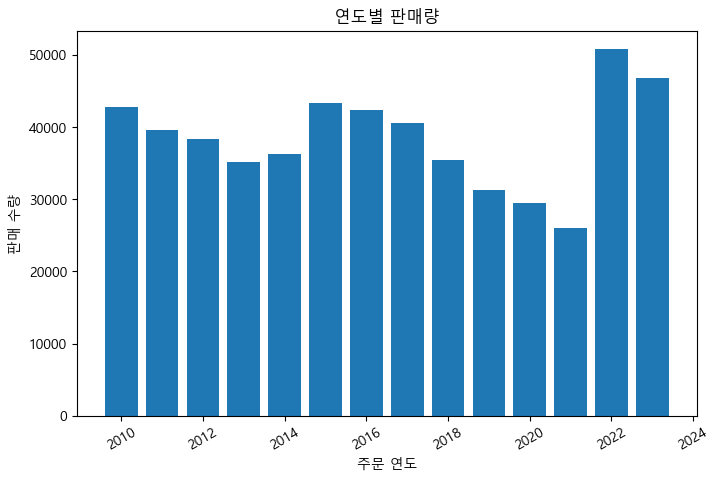

In [104]:
## 연도별 판매량
df_year = df['year'].value_counts().sort_index().copy()

# fig : 그래프의 빈 도면, 여기에 그래프의 모든 내용이 그려짐
# ax : 실제로 그래프와 plot을 그리는 데 사용되는 영역
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(df_year.index, df_year.values)
ax.set_xlabel('주문 연도')
ax.set_ylabel('판매 수량')

plt.title('연도별 판매량')
plt.xticks(rotation=30)
plt.show()

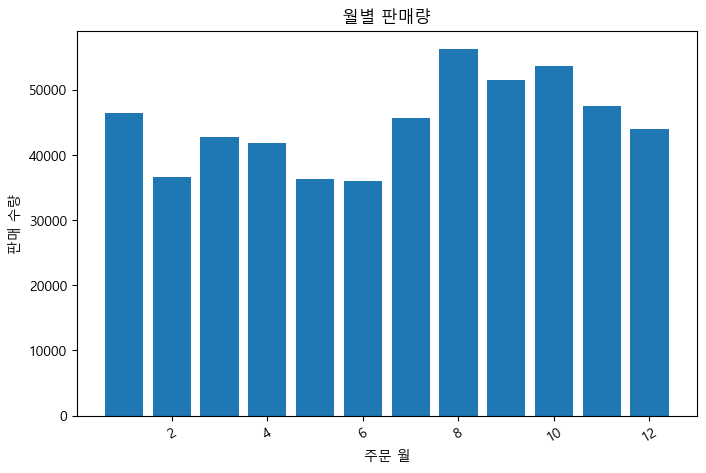

In [105]:
## 월별 판매량
df_month = df['month'].value_counts().sort_index().copy()

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(df_month.index, df_month.values)
ax.set_xlabel('주문 월')
ax.set_ylabel('판매 수량')

plt.title('월별 판매량')
plt.xticks(rotation=30)
plt.show()

## 칼럼명